# Practicing Clustering Techniques
<i>by A7MD0V</i>

Clustering methods can be used to visualize data and then agglomerate or
distribute it. 

Since most of empirical sciences are based on numbers, controlling the flow
of numbers and associating labels with these actions and quantities, will give me
insight on developing general intelligence.

In [6]:
# Importing tools and libraries:
import sys
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [7]:
# Setting up Notebook params
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)
print("Using Python: ", sys.version)

Using Python:  3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


(7, 2)


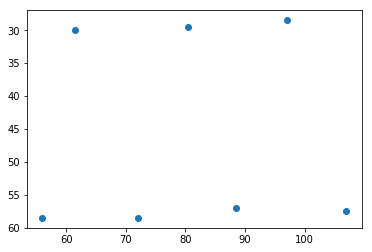

The points resemble the centre of bounding boxes
which are classifying characters on a license plate


In [15]:
# Defining a sample dataset that needs to be clustered
X = np.array([[56,58.5],[61.5,30],[72,58.5],[80.5,29.5],[88.5,57],[97,28.5],[107,57.5]])
print(X.shape) # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])
plt.gca().invert_yaxis()
plt.show()
print("The points resemble the centre of bounding boxes\nwhich are classifying characters on a license plate")

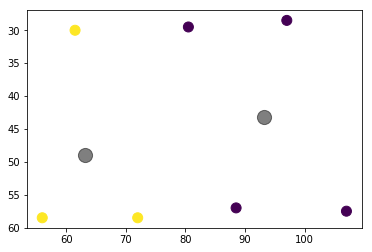

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100, cmap='viridis')
centers = kmeans.cluster_centers_
plt.gca().invert_yaxis()
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

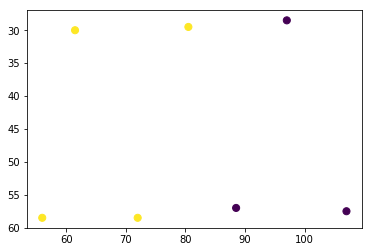

In [24]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
# 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
        for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');
plt.gca().invert_yaxis()

In [31]:
for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=2)
    clustering.fit(X)
    
    # Work with Divisive Agglomerative Clustering

TypeError: plot_clustering() missing 2 required positional arguments: 'X' and 'labels'